In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [3]:
df = pd.read_csv('fraudTrain.csv')
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,01/01/2019 0:00,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",09/03/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,01/01/2019 0:00,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,21/06/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,01/01/2019 0:00,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,19/01/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,01/01/2019 0:01,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,12/01/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,01/01/2019 0:03,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,28/03/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0



* cc_num: 2.700000e+15. Likely represents a credit card number. The scientific notation suggests it’s stored as a float, but it's better treated as a string to avoid precision errors.

* zip : 28654.	Likely the ZIP code or postal code associated with the transaction or cardholder’s billing address. Useful for identifying fraud patterns based on geographic data.
* trans_num : 0b242abb623afc578575680df30655b9.	Likely a unique transaction ID — often alphanumeric for tracking individual transactions. This is useful for identifying specific entries but shouldn't be used as a predictive feature.

* unix_time : 1325376018. 	Represents the timestamp of the transaction in Unix time (seconds since Jan 1, 1970). Converting this into readable date formats (e.g., datetime) can reveal valuable insights like transaction patterns, time-of-day trends, etc

In [4]:
df['is_fraud'].value_counts()

is_fraud
0    324629
1      2346
Name: count, dtype: int64

In [5]:
percentage_fraud = (2346/324629)*100
percentage_fraud

0.7226711107140767

<Axes: xlabel='is_fraud'>

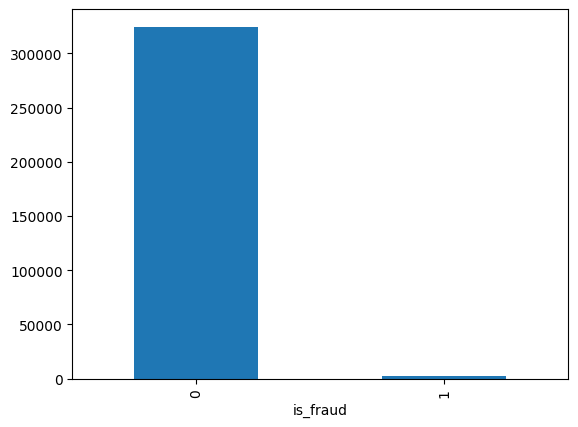

In [6]:
df['is_fraud'].value_counts().plot(kind='bar')

In [7]:
df.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [8]:
print(df.duplicated().sum())

0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326975 entries, 0 to 326974
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  326975 non-null  object 
 1   cc_num                 326975 non-null  float64
 2   merchant               326975 non-null  object 
 3   category               326975 non-null  object 
 4   amt                    326975 non-null  float64
 5   first                  326975 non-null  object 
 6   last                   326975 non-null  object 
 7   gender                 326975 non-null  object 
 8   street                 326975 non-null  object 
 9   city                   326975 non-null  object 
 10  state                  326975 non-null  object 
 11  zip                    326975 non-null  int64  
 12  lat                    326975 non-null  float64
 13  long                   326975 non-null  float64
 14  city_pop               326975 non-nu

In [10]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format="%d/%m/%Y %H:%M", errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326975 entries, 0 to 326974
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  326975 non-null  datetime64[ns]
 1   cc_num                 326975 non-null  float64       
 2   merchant               326975 non-null  object        
 3   category               326975 non-null  object        
 4   amt                    326975 non-null  float64       
 5   first                  326975 non-null  object        
 6   last                   326975 non-null  object        
 7   gender                 326975 non-null  object        
 8   street                 326975 non-null  object        
 9   city                   326975 non-null  object        
 10  state                  326975 non-null  object        
 11  zip                    326975 non-null  int64         
 12  lat                    326975 non-null  floa

In [11]:
numeric = ['trans_date_trans_time', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']

df_numeric = df[numeric]
df_numeric.head()

,trans_date_trans_time,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:00,2.700000e+15,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:00,6.300000e+11,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:00,3.890000e+13,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:00,3.530000e+15,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:00,3.760000e+14,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0


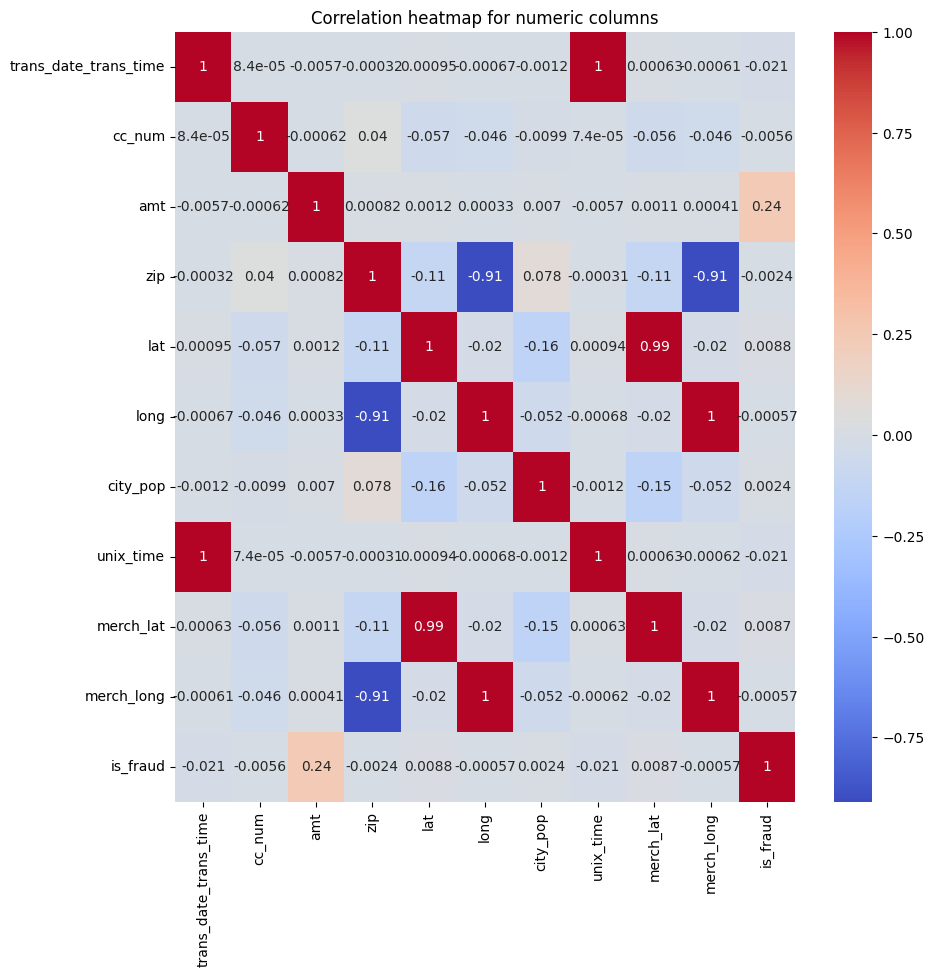

In [12]:
# feature correlation plot

plt.figure(figsize = (10, 10))
plt.title('Credit card fraud detection correlation plot')

corr = df_numeric.corr()
# sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths= .1, cmap='Reds')
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap for numeric columns')
plt.show()

some of the features are repeating, we will drop them for better understanding of correlations

In [13]:
new_df = df_numeric.drop(columns=['unix_time', 'merch_lat', 'merch_long'])
new_df.head()

,trans_date_trans_time,cc_num,amt,zip,lat,long,city_pop,is_fraud
0,2019-01-01 00:00:00,2.700000e+15,4.97,28654,36.0788,-81.1781,3495,0
1,2019-01-01 00:00:00,6.300000e+11,107.23,99160,48.8878,-118.2105,149,0
2,2019-01-01 00:00:00,3.890000e+13,220.11,83252,42.1808,-112.2620,4154,0
3,2019-01-01 00:01:00,3.530000e+15,45.00,59632,46.2306,-112.1138,1939,0
4,2019-01-01 00:03:00,3.760000e+14,41.96,24433,38.4207,-79.4629,99,0


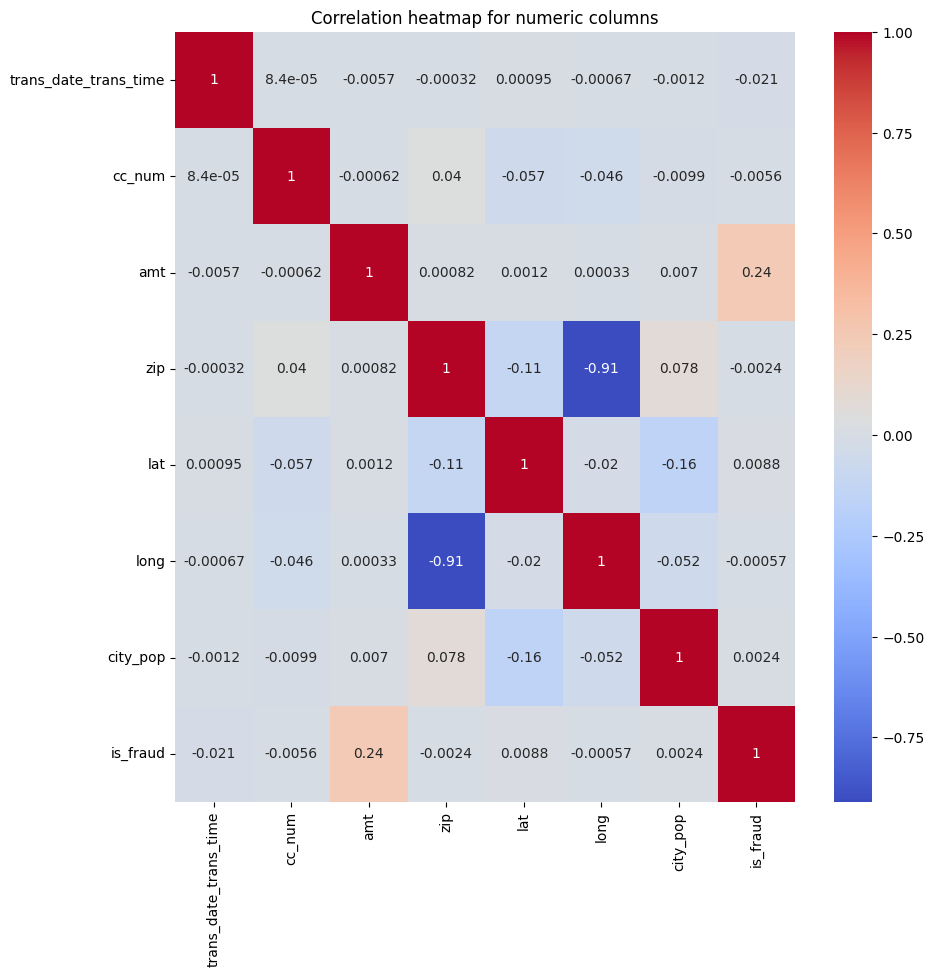

In [14]:

plt.figure(figsize = (10, 10))
plt.title('Credit card fraud detection correlation plot')

corr = new_df.corr()
# sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths= .1, cmap='Reds')
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap for numeric columns')
plt.show()

Should i scale my data?
Most of these features don't seem to be correlating with the output. Should i drop them?
